# Time Series Analysis On Various Google Trends

## Key Concept: Variables that capture seasonality can be included in the model to retrieve more accurate models.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [3]:
def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :]
    df.columns = ['values']
    df['values'] = df['values'].str.replace('<1', '0').astype(int)
    return df

In [5]:
df = load_trend(**{'trend_name': 'data-science', 'country_code': 'us'})

In [4]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'game-of-thrones', 'country_code': 'us'},
    {'trend_name': 'pokemon', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},   
]

In [5]:
trend_dfs = [load_trend(**trend) for trend in trends]

In [6]:
trend_df = trend_dfs[0]

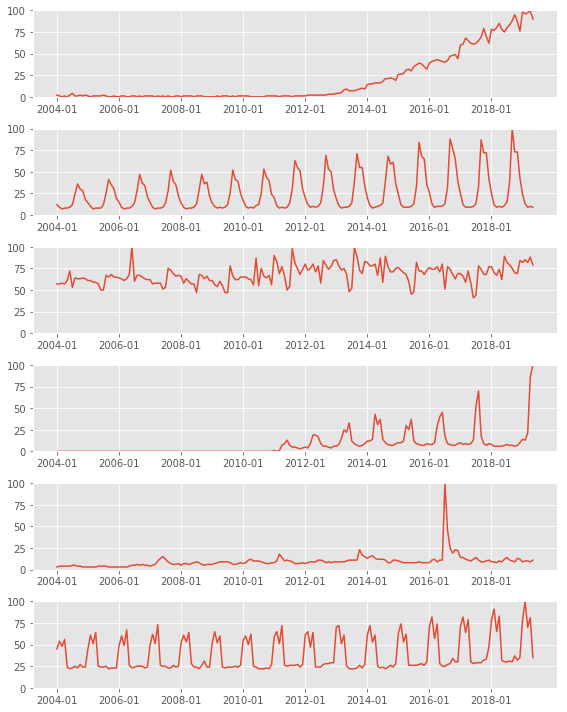

In [7]:
import matplotlib; matplotlib.style.use('ggplot')

fig, axs = plt.subplots(len(trend_dfs), 1, figsize=(8, 10))
plt.tight_layout()
for i, trend_df in enumerate(trend_dfs):
    ax = axs[i]
    #ax.set_title(str(trends[i]))
    ax.plot(trend_df.index, trend_df['values'])
    ticks = ax.get_xticks()
    ax.set_ylim((0, 100))
    ax.set_xticks([tick for tick in ticks if tick%24 == 0])

### Investigating google searches for Taxes in the US

In [8]:
taxes_df = load_trend('taxes')
taxes_df['i'] = np.arange(len(taxes_df))
taxes_df['month'] = taxes_df['i'] % 12
taxes_df['month'] += 1

In [9]:
taxes_df

,values,i,month
2004-01,45,0,1
2004-02,54,1,2
2004-03,48,2,3
2004-04,56,3,4
2004-05,24,4,5
2004-06,22,5,6
2004-07,23,6,7
2004-08,25,7,8
2004-09,23,8,9
2004-10,27,9,10


In [10]:
trend_model = LinearRegression()
trend_model.fit(taxes_df[['i']], taxes_df['values'])
trend_line = trend_model.predict(taxes_df[['i']])

In [11]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(taxes_df[['month']])
month_data = month_encoder.transform(taxes_df[['month']]).toarray()

In [12]:
lr = LinearRegression()
data = np.hstack((taxes_df[['i']].values, month_data))
lr.fit(data, taxes_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

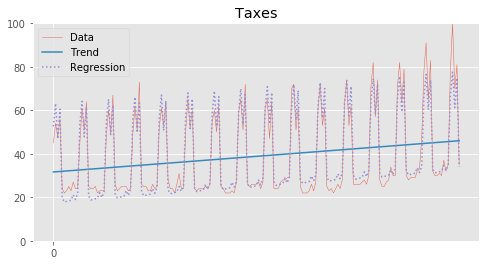

In [13]:
trend_df = taxes_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Taxes')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

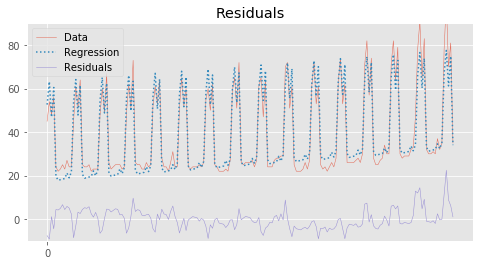

In [14]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

## Combining the modelling steps into functions

### Investigating Football google searches both in the US vs UK

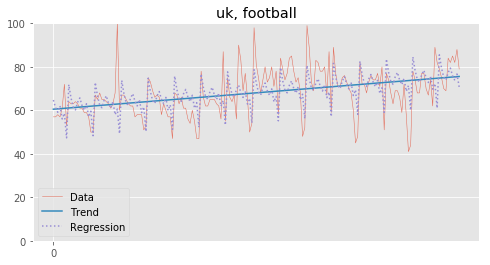

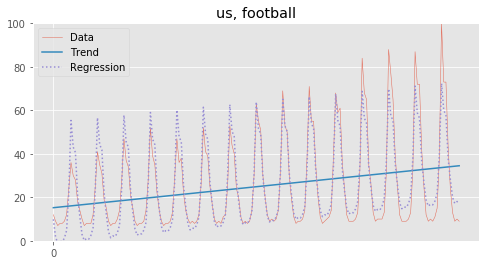

In [17]:
def fit_trend_model(trend_df):
    trend_df['i'] = np.arange(len(trend_df))
    trend_df['month'] = trend_df['i'] % 12
    trend_df['month'] += 1

    trend_model = LinearRegression()
    trend_model.fit(trend_df[['i']], trend_df['values'])
    trend_line = trend_model.predict(trend_df[['i']])

    month_encoder = OneHotEncoder(categories='auto')
    month_encoder.fit(trend_df[['month']])
    month_data = month_encoder.transform(trend_df[['month']]).toarray()

    lr = LinearRegression()
    data = np.hstack((trend_df[['i']].values, month_data))
    lr.fit(data, trend_df['values'])
    return trend_df, trend_line, lr, data

def get_prediction_for_trend(topic, country):
    trend_df = load_trend(topic, country)
    trend_df, trend_line, lr, data = fit_trend_model(trend_df)
    lr_pred = lr.predict(data) # Predixctive model based on i and month
    return trend_df, trend_line, lr_pred

def plot_predictions(topic, country):
    trend_df, trend_line, lr_pred = get_prediction_for_trend(topic, country)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_title(f"{country}, {topic}")
    ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
    ax.plot(trend_df['i'], trend_line, label='Trend')
    ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
    plt.legend()
    ticks = ax.get_xticks()
    ax.set_ylim((0, 100))
    ax.set_xticks([tick for tick in ticks if tick%24 == 0])
    plt.show()

plot_predictions('football', 'uk')
plot_predictions('football', 'us')